# Exercici 1

Agafa un conjunt de dades de tema que t'agradi i selecciona un atribut del conjunt de dades. Calcula la moda, la mediana, la desviació estàndard i la mitjana aritmètica. 

In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("heart_2020_cleaned.csv")

In [7]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


We will take the variable BMI, which is the Body Mass Index. It is used to categorize people's weight as underweight, normal weight, or overweight using their body mass and height.

In [14]:
df["BMI"].describe().round(2)

count    319795.00
mean         28.33
std           6.36
min          12.02
25%          24.03
50%          27.34
75%          31.42
max          94.85
Name: BMI, dtype: float64

# Exercici 2

Continuant amb les dades, selecciona dos atributs i calcula'n la seva correlació. 

In [8]:
df["PhysicalHealth"].corr(df["SleepTime"]).round(2)

-0.06

There is no correlation between physical health and sleep time.

# Exercici 3

Continuant amb les dades, calcula la correlació de tots els atributs entre sí i representa'ls en una matriu amb diferents colors d'intensitat.

In [9]:
df.corr()

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.109788,0.064131,-0.051822
PhysicalHealth,0.109788,1.000000,0.287987,-0.061387
MentalHealth,0.064131,0.287987,1.000000,-0.119717
SleepTime,-0.051822,-0.061387,-0.119717,1.000000


[Text(0.5, 1, 'BMI, Physical Health, Mental Health, and Sleep Time correlations')]

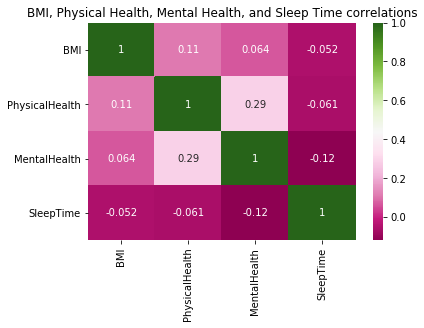

In [18]:
sns.heatmap(df.corr(), annot=True, cmap = "PiYG").set(
    title = "BMI, Physical Health, Mental Health, and Sleep Time correlations")

There seems to not be any correlation between the variables.

# Exercici 4

Continuant amb les dades, selecciona un atribut i calcula la mitjana geomètrica i la mitjana harmònica.

In [20]:
def geo_mean(i):
    return np.exp(np.log(i).mean()) #written this way to avoid overflow

res = geo_mean(df["SleepTime"]).round(2)
print("Geometric mean of sleep time:", res)

Geometric mean of sleep time: 6.94


In [26]:
def har_mean(i):
    return len(i) / np.sum(1.0 / i) 

res = har_mean(df["SleepTime"]).round(2)
print("Harmonic mean of sleep time:", res)

Harmonic mean of sleep time: 6.73


Both geometric and harmonic means are mainly used for economics. 

The geometric mean is suitable for data that show serial correlation, like investments. It can be calculated by multiplying all the numbers in the data set and taking the nth root, where n is the total count of values in the data set.

The harmonic mean is usually used for averages of rates or price-earning ratios. It is calculated by dividing the total count of values by the reciprocal of each value.